<a href="https://colab.research.google.com/github/Zero-Sik/Py_ML_Deep_Learning/blob/master/Text_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텍스트 전처리(Text preprocessing)

 - 자연어 처리에 있어서 텍스트 전처리는 매우 중요한 작업이다.
 - 텍스트 전처리는 용도에 맞게 텍스트를 사전에 처리하는 작업(요리에 있어서 재료를 제대로 손질 하지 않으면, 요리가 제대로 되지 않는 것과 같다.).
 - 텍스트에 대해서 제대로 된 전처리를 하지 않으면 뒤에서 배울 자연어 처리 기법들이 제대로 동작 안함.
 

## 토큰화(Tokenization)
 - 자연어 처리에서 크롤링 등으로 얻어낸 코퍼스 데이터가 필요에 맞게 전처리되지 않은 상태라면, 해당 데이터를 사용하고자하는 용도에 맞게 토큰회(tokenization) & 정제(cleaning) & 정규화(normalization)하는 일을 하게 됨.

 - 주어진 코퍼스(corpus)에서 토큰(token)이라 불리는 단위로 나누는 작업을 토큰화(tokenization)라고 부름.
 - 토큰의 단위가 상황에 따라 다르지만, 보통 의미있는 단위로 토큰을 정의함.
 - 

### 단어 토큰화(Word Tokenization)
 - 단어(Word)는 단어 단위 외에도 단어구, 의미를 갖는 문자열로도 간주됨.
 - 예) 아래의 입력으로부터 구두점(punctuation)과 같은 문자는 제외 시키는 간단한 단어 토큰화 작업 실시.
  -구두점이란, 은점(.), 컴마(,), 물음표(?), 세미콜론(;), 느낌표(!) 등과 같은 기호.
  - 입력 : Time is an illusion. Lunchtime double so!
   - 이러한 입력으로부터 구두점을 제외시킨 토큰화 작업의 결과는 다음과 같다.
    - 출력 : "Time", "is", "an", "illusion", 'double', "so"

  - 예제에서 토큰화 작업은 굉장히 간단하며, 구두점을 지운 뒤에 띄어쓰기(whitespace)를 기준으로 잘라냄.


 - 특수문자를 전부 제거하는 정제(cleaning) 작업을 수행하는 것만으로 해결되지 않음.
 - 구두점이나 특수문자를 전부 제거하면 토큰이 의미를 잃어버리는 경우가 발생.




### 토큰화 중 생기는 선택의 순간
 - 토큰화의 기준
  - 해당 데이터를 가지고 어떤 용도로 사용할 것인지에 따라, 그 용도에 영향이 없는 기준으로 정하면 된다.
  - 예) 영어권 언어에서 아포스트로피를(')가 들어가있는 단어는 어떻게 토큰으로 분류해야될까라는 문제

   - 예) Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop.
   아포스트로피가 들어간 상황에서 Don't와 Jone's는 어떻게 토큰화 시킴?


   - Don't
   - Don t
   - Dont

   - Do n't

   Jone's
   - Jone s
   - Jone
   - Jones


  - 원하는 결과가 나오도록 토큰화 도구를 직접 설계할 수도 있지만, 기존에 공개된 도구들을 사용하였을 때의 결과가 사용자의 목적과 일치한다면 해당 도구를 사용할 수 도 있을 것임.
  - NLTK는 영어 코퍼스를 토큰화하기 위한 도구를 제공.
  - 그 중 work_tokenize와 WordPunctTokenizer를 사용해서 NLTK에서는 아포스트로피를 어덯게 처리하는지 확인.
  

In [0]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
print(text_to_word_sequence("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


- word_tokenize는 Don't를 Do와 n't로 분리하였으며, 반면 Jone's는 Jone과 's로 분리한 것을 확인.

In [0]:
from nltk.tokenize import WordPunctTokenizer  #wordPunctTokenizer
print(WordPunctTokenizer().tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


- WordPunctTokenizer는 구두점을 별도로 분류하는 특징을 갖고 있기 때문에, 앞서 확인했던 word_tokenize와는 달리 Don't를 Don과 '와 t로 분리함.


In [0]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
print(text_to_word_sequence("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


- 케라스의 text_to_word_sequence는 기본적으로 모든 알파뱃을 소문자로 바꾸면서 온점이나 컴마, 느낌표 등의 구두점을 제거. 하지만 don't나 'jone's와 같은 경우 아포스트로피는 보존.


### 토큰화에서 고려해야할 사항
 - 토큰화 작업을 단순하게 코퍼스에서 구두점을 제외하고 공백 기준으로 잘라내는 작업이라고 간주할 수 없다.
 - 이러한 일은 섬세한 알고리즘이 필요한데, 왜 섬세해야하는지 그 이유를 정리할 것.


  - 1) 구두점이나 특수 문자를 단순 제외해서는 안 된다.
   - 갖고 있는 코퍼스에서 단어들을 걸러낼 떄, 구두점이나 특수 문자를 단순히 제외하는 것은 옳지 않다.
   -코퍼스에 대한 정제 작업을 진행하다보면 구두점조차도 하나의 토큰으로 분류함.
  

  - 2) 줄임말과 단어 내에 띄어쓰기가 있는 경우
   - 토큰화 작업에서 종종 영어권 언어의 아포스트로피(')는 압축된 단어를 다시 펼치는 역할을 하기도 한다.
   - 예) what're는 what are의 줄임말. we're는 we are의 줄임말. 
   - 토큰화 작업은 저러한 단어를 하나로 인식할 수 있는 능력도 가져야함.
   

  - 3) 표준 토큰화 예제
   - 이해를 돕기 위해, 표준으로 쓰이고 있는 토큰화 방법 중 하나인 Penn Treeback Tokenization의 규칙


    - 규칙 1. 하이푼으로 구성된 단어는 하나로 유지.
    - 규칙 2. doesn't와 같이 아포스트로피 '접어'가 함께하는 단어는 분리
   
    - 해당 표준에 아래의 문장을 input을 넣어줌
   
   - "Starting a home-based restaurant may be an ideal. it doesn't have a food chain or restaurant of their own."
   



   

In [0]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
text="Starting a home-based restaurant may be an ideal. it doesn't have a food chain or restaurant of their own."
print(tokenizer.tokenize(text))



['Starting', 'a', 'home-based', 'restaurant', 'may', 'be', 'an', 'ideal.', 'it', 'does', "n't", 'have', 'a', 'food', 'chain', 'or', 'restaurant', 'of', 'their', 'own', '.']


- 결과를 보면, 각각 규칙1과 규칙2에 따라서 horm-based는 하나의 토큰으로 취급하고 있으며, dosen't의 경우 dose와 n't는 분리 되었음.

### 문장 토큰화(Sentence Tokenization)


 - 토큰의 단위가 문장(sentence)일 떄의 방법.

 - 코퍼스 내에서 문장 단위로 구분하는 작업으로 떄로는 문장 분류(sentence segmentation)라고 부름,


 - 코퍼스는 문장 단위로 구분되어 있지 않는 가능성이 높음.
 - 사용하고자 하는 용도에 맞게 하기 위해서는 문장 토큰화가 필요함.



 - EX1) IP 192.168.56.31 서버에 들어가서 로그 파일 저장해서 youngsik3200@gmail.com로 결과 보내기.


 - EX2) Since I'm actively looking for Ph.D sutends, I get the same question a dozen times every year.


 - 첫 문장 : 보내줘.
 - 두 번쨰 문장 : year.
  - 단순히 온점(.)으로 문장을 구분짓는다고 가정하면, 문장의 끝이 나오기 전에 이미 온점이 여러번 등장하여 예상한 결과가 나오지 않게 됨.

  - 그렇기 때문에 사용하는 코퍼스가 어떤 국적의 언어인지, 또는 해당 코퍼스 내에서 특수문자들이 어떻게 사용되고 있는지에 따라서 직접 규칙들을 정의해볼 수 있다.
  - 물론, 100% 정확도를 얻는 일은 쉬운 일이 아님.
  - 갖고 있는 코퍼스 데이터에 오타나, 문장의 구성이 엉망이라면 정해놓은 규칙이 소용이 없을 수 있음


  -NLTK에서는 영어 문장의 토큰화를 수행하는 sent_tokenize를 지원


  


In [0]:
from nltk.tokenize import sent_tokenize
text="His barber kept his word. But keeping such a huge secret to himself was driving him crazy. Finally, the barber went up a mountain and almost to the edge of a cliff. He dug a hole in the midst of some reeds. He looked about, to mae sure no one was near."
print(sent_tokenize(text))
# text에 저장된 여러 개의 문장들로부터 문장을 구분하는 코드.


['His barber kept his word.', 'But keeping such a huge secret to himself was driving him crazy.', 'Finally, the barber went up a mountain and almost to the edge of a cliff.', 'He dug a hole in the midst of some reeds.', 'He looked about, to mae sure no one was near.']


In [0]:
from nltk.tokenize import sent_tokenize
text="I am actively looking for Ph.D. students. and you are a Ph.D student."
print(sent_tokenize(text))

['I am actively looking for Ph.D. students.', 'and you are a Ph.D student.']


  - NLTK는 단순히 온점을 구분자로 하여 문장을 구분하지 않기 때문에, Ph.D.를 문장내의 단어로 인식하여 성공적으로 인식하는 것을 볼 수 있음.

  - 물론 한국어에 대한 묹아 토큰화 도구가 존재함.
  - 한국어 대해 문장 토큰화 도구가 여럿있지만, 여기에서는 박상길님이 개발한 KSS(Korean Sentence Splitter).


  - pip install kss

In [0]:
import kss  # 한국어 문장 사용.
text='딥 러닝 자연어 처리가 재미있기는 합니다. 그런데 문제는 영어보다 한국어로 할 때 너무 어려워요. 농담아니에요. 이제 해보면 알걸요?'
print(kss.split_sentences(text))

ModuleNotFoundError: ignored

### 이진 분류기(Binary Classifier)
 - 문장 토큰화에서의 예외 사항을 발생시키는 온점의 처리를 위해서 입력에 따라 두 개의 클래스로 분류하는 이진 분류기 사용.

 - 이진 분류기는 앞서 언급했듯이, 임의로 정한 여러가지 규칙을 코딩한 함수일 수도 있으며, 머신 러닝을 통해 이진 분류기를 구현하기도 함.

 - 온점(.)이 어떤 클래스에 속하는지 결정을 위해서는 어떤 온점이 주로 약어(abbreviation)으로 쓰이는 지 알아야 함.
 - https://public.oed.com/how-to-use-the-oed/abbreviations/
 - 이러한 문장 토큰화를 수행하는 오픈 소스로는 NLTK, OpenNLP, 스탠포드 CoreNLP, splitta, LingPipe 등이 있습니다. 문장 토큰화 규칙을 짤 때, 발생할 수 있는 여러가지 예외사항을 다룬 참고 자료로 아래 링크를 보면 좋습니다.

### 한국어에서의 토큰화의 어려움
 - 영어는 New York과 같은 합성어나 He's 와 같이 줄임말에 대한 예외처리만 한다면 띄어쓰기(Whitespace)를 기준으로 하는 띄어쓰기 토큰화를 수행해도 단어 토큰화가 잘 작동함.


 - 한국어의 경우에는 띄어쓰기 단위가 되는 단위를 '어절'이라고 하는데, 즉 어절 토큰화는 한국어 NPL에서 지양되고 있다.
 - 어절 토큰화와 단어 토큰화가 같지 않기 때문입니다. 그 근본적인 이유는 한국어가 영어와ㅇ는 다른 형태를 가지는 언어인 교착어라는 점에서 기인합니다.


- 한국어는 교착어다.
 - 같은 단어임에도 서로 다른 조사가 붙어서 다른 단어로 인식이 되면 자연어 처리가 힘들고 번거로워지는 경우가 많다. 대부분의 한국어 NPL에서 조사는 분리해줄 필요가 있다.
 - 즉, 띄어쓰기 단위가 영어처럼 독립적인 단어라면 띄어쓰기 단위로 토큰화를 하면 되겠지만 한국어는 어절이 독립적인 단어로 구성되는 것이 아니라 조사 등의 무언가가 붙어있는 경우가 많아서 이를 전부 분리해줘야 한다는 의미.


 - 한국어 토큰화에서는 형태소(morpheme)란 개념을 반드시 이해해야 한다. 형태소(morphome)란 뜻을 가진 가장 작은 말의 단위를 말함.

  - 자립 형태소 : 접사,어미, 조사와 상관없이 자립하여 사용할 수 있는 형태소, 그 자체로 단어가 된다. 체언(명사, 대명사, 수사) 수식언(관형사, 부사), 감탄사 등이 있다.
  - 의존 형태소 : 다른 형태소와 결합하여 사용되는 형태소, 접사, 어미, 조사, 어간을 말한다.


   - 예를 들어.
    - 문장 : 에디가 딥러닝 책을 읽다.
    - 이를 형태소 단위로 분해하면 다음과 같다.
     -자립 형태소: 에디, 딥러닝책
     -의존 형태소 : -가, -을, -읽, -있, -다

  -이를 통해 유추할 수 있는 것은 한국어에서 영어에서의 단어 토큰화와 유사한 형태를 얻으려면 어절 토큰화가 아니라 형태소 토큰화를 수행.

- 2) 한국어는 띄어쓰기가 영어보다 잘 지켜지지 않는다.
 - 한국어 코퍼스가 뉴스 기사와 같이 띄어쓰기를 철저하게 지키려고 노력 함.


# 정제(Cleaning) and 정규화(Normalization)


- 코퍼스에서 용도에 맞게 토큰을 분류하는 작업을 정규화(tokenization)라고 하며, 토큰화 작업 전, 후에는 텍스트 데이터를 용도에 맞게 정제(cleaning) 및 정규화(nNormalization)하는 일이 항상 함께합니다. 정제 및 정규화의 목적은 각각 다음과 같습니다.

 - 정제 : 갖고 있는 코퍼스로부터 노이즈 데이터를 제거함.
 - 정규화 : 표현 방법이 다른 단어들을 통합시켜서 같은 단어로 만듬.


- 정제 작업은 토큰화 작업에 방해가 되는 부분들을 배제시키고 토큰화 작업을 수행하기 위해서 토큰화 작업보다 앞서 이루어지기도 하지만, 토큰화 작업 이후에도 여전히 남아있는 노이즈들을 제거하기위해 지속적으로 이루어지기도 함.
- 사실 완벽한 정제 작업은 어려운 편이라서, 대부분의 경우 이 정도면 됐다. 라는 일종의 합의점을 찾음.




## 1. 규칙에 기반한 표기가 다른 단어들의 통합


 - USA와 US는 같은 의미를 가지므로, 하나의 단어로 정규화해볼 수 있다. 
 -uh-huh와 uhhuh는 형태는 다르지만 여전히 같은 의미를 가지고 있다.
 - 이러한 정규화를 거치게 되면 US를 찾아도 USA도 함께 찾을 수 있다.
 

## 2. 대, 소문자 통합

 - Automobile이라는 단어가 문장의 첫 단어였기 때문에 A가 대문자였다고 생각해도, 여기에 소문자 변환을 사용하면, automoblie을 찾는 질의(query)에서, 결과로서 Automobile도 찾게 됨.

  - 예) 검색 엔진에서 사용자가 페라리 차량에 관심이 있어서 페라리를 검색할 경우 a Farraricar라고 봐야하는데, 하지만, 검색 엔진은 소문자 변환을 적용했을 것이기 때문에 ferrari만 쳐도 원하는 결과를 얻을 수 있음.


 - 머신 러닝 시퀀스 모델로 더 정확하게 진행시킬 수 있습니다. 하지만, 만약 올바른 대문자 단어를 얻고 싶은 상황에서, 훈련에 사용하는 코퍼스가 사용자들이 단어의 대문자, 소문자의 올바른 사용 방법과 상관없이 소문자를 사용하는 사람들로부터 나온 데이터라면 이러한 방법 또한 그다지 도움이 되자 않음.
 - 결국에는 예외사항을 크게 고려하지 않고, 모든 코퍼스를 소문자로 바꾸는 것이 종종 더 실용적인 해결책이 되기도 함.

 


## 불필요한 단어의 제거 (Removing Unnecessary Words)


 - 정제 작업에서 제거해야하는 노이즈 데이터(noise data)는 자연어가 아니면서 아무 의미도 갖지 않는 글자들(특수 문자 등)을 의미.
 -분석 하고자 하는 목적에 맞지 않는 불필요 단어들을 노이즈 데이터라고 하기도 함.

  - 불필요 단어들을 제거하는 방법으로는 불용어 제거와 등장 빈도가 적은 단어, 길이가 짧은 단어들을 제거하는 방법이 있다.



 - (1) 등장 빈도가 적은 단어(Removing Rare words)
  - 텍스트 데이터에서 너무 적게 등장해서 자연어 처리에 도움이 되지 앟는 단어들이 존재
  - 입력된 메일이 정상 메일인지 스팸 메일인지를 분류하는 스팸 메일 분류기를 설계한다고 가정
   - 총 100,000개의 메일을 가지고 정상 메일에서는 어떤 단어들이 주로 등장하고, 스팸 메일에서는 어떤 단어들이 주로 등장하는지를 가지고 설계
   - 이때 100,000개의 메일 데이터에서 총 합 5번 밖에 등장하지 않은 단어가 있다면 이 단어는 직관적으로 분류에 거의 도움이 되지 않은 것을 알 수 잇음.

 - (2) 길이가 짧은 단어(Removing words with very a short length)
  - 영어권 언어에서는 길이가 짧은 단어를 삭제하는 것만으로 어느정도 자연어 처리에서 크게 의미가 없는 단어를 제거하는 효과를 볼 수 있음.
  - 길이가 짧은 단어를 제거하는 2차 이유는 길이를 조건으로 텍스트를 삭제하면서 단어가 아닌 구두점들까지도 한꺼번에 제거하기 위함도 있다.
  - 그 이유는?
   - 단정적으로 말할 수는 없지만, 확실한 사실은 영어 단어의 길이가 한국어 단어의 길이보다는 평균적으로 길다.

   - 이는 영어 단어와 한국어 단어에서 각 한 글자가 가진 의미의 크기가 다르다는 점에서 기인함.
   

In [0]:
import re
text = "I was wondering if anyone out there could enlighten me on this car."
shortword = re.compile(r'\W*\b\w{1,2}\b')
print(shortword.sub('', text))

 was wondering anyone out there could enlighten this car.


## - 정규 표현식(Regular Expression)
 - 얻어낸 코퍼스에서 노이즈 데이터의 특징을 잡아낼 수 있다면, 정규 표현식을 통해서 이를 제거할 수 있는 경우가 있으며, 가령 HTML 문서로부터 가져온 코퍼스라면 문서 여기저기에 HTML 태그가 있으며, 뉴스 기사를 크롤링 했다면, 기사마다 게재 시간이 적혀져 있을 수 있습니다.
 - 정규 표현식은 이러한 코퍼스 내에 계속해서 등장하는 글자들을 규칙에 기반하여 한 번에 제거 하는 방식으로 매우 유용.

 

# 어간 추출(Stemming) and 표제어 추출(Lemmatization)

- 하나의 단어로 일반화 시켜서 문서 내의 단어 수를 줄임.


### 표제어 추출(Lemmatization)
 - 표제어는 한글로는 '표제어' 또는 '기본 사전형 단어' 정도의 의미.
 - 표제어 추출은 단어들로부터 표제어를 찾아가는 과정.
 - 표제어 추출은 단어들이 다른 형태를 가지더라도 그 뿌리 단어를 찾아가서 단어의 개수를 줄일 수 있는지 판단.
 - 예) am, are is는 서로 다른 스펠리이지만 그 뿌리 단어는 be 라고 부름.
 

 - 표제어 추출을 하는 가장 섬세한 방법은 단어의 형태학적 파싱을 먼저 진행하는 것.
 -형태소란 '의미를 가진 가장 작은 단위'를 뜻함.
 
  -형태소는 두 가지 종류 어간(sterm)과 접사(affix)
   - 어간 : 단어의 의미를 담고 있는 단어의 핵심 부분.
   - 접사 : 단어에 추가적인 의미를 주는 부분

  - 형태학적 파싱은 이 두 가지 구성 요소를 분리하는 작업.
  - 가령, cats라는 단어에 대해 형태학적 파싱을 수행했다면, 형태학적 파싱은 결과로 cat(어간)dhk -s(접사)를 분리
  - 꼭 두 가지 분리되지 않는 경우도 있ㅇ음. 단어 fox는 형태학적 파싱을 한다고  하더라도 더 이상 분리할 수 없다. fox는 독립적인 형태소이기 떄문.


   -NLTK에서는 표제어 추출을 위한 도구 WordNetLemmatizer를 지원

   




In [0]:
from nltk.stem import WordNetLemmatizer
n=WordNetLemmatizer()
words=['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
print([n.lemmatize(w) for w in words])

['policy', 'doing', 'organization', 'have', 'going', 'love', 'life', 'fly', 'dy', 'watched', 'ha', 'starting']


 - WordNetLemmatizer는 입력으로 단어가 동사 품사라는 사실을 알려줄 수 있다. 즉, dies와 watched, has가 문장에서 동사로 쓰였다는 것을 알려준다면 표제어 추출기는 품사의 정보를 보존하면서 정확한 Lemma를 출력하게 됨.
 

### 어간 추출(Stemming)
 - 어간을 추출하는 작업을 어간 추출(stemming)이라고 함.
 -어간 추출은 형태학적 분석을 단순화한 버전이라고 함, 정해진 규칙만 보고 단어의 어미를 자르는 어림짐작의 작업이라고 볼 수 있음.
 - 어간 추출 알고리즘 중 하나인 포터 알고리즘(Porter Algorithm)을 사용.

 - input : This was not the map we found in Billy Bones's chest, but an accurate copy, complete in all things--names and heights and soundings--with the single exception of the red crosses and the written notes.




 

In [0]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
s = PorterStemmer()
text="This was not the map we found in Billy Bones's chest, but an accurate copy, complete in all things--names and heights and soundings--with the single exception of the red crosses and the written notes."
words=word_tokenize(text)
print(words)


print([s.stem(w) for w in words])

['This', 'was', 'not', 'the', 'map', 'we', 'found', 'in', 'Billy', 'Bones', "'s", 'chest', ',', 'but', 'an', 'accurate', 'copy', ',', 'complete', 'in', 'all', 'things', '--', 'names', 'and', 'heights', 'and', 'soundings', '--', 'with', 'the', 'single', 'exception', 'of', 'the', 'red', 'crosses', 'and', 'the', 'written', 'notes', '.']
['thi', 'wa', 'not', 'the', 'map', 'we', 'found', 'in', 'billi', 'bone', "'s", 'chest', ',', 'but', 'an', 'accur', 'copi', ',', 'complet', 'in', 'all', 'thing', '--', 'name', 'and', 'height', 'and', 'sound', '--', 'with', 'the', 'singl', 'except', 'of', 'the', 'red', 'cross', 'and', 'the', 'written', 'note', '.']


- 위의 알고리즘의 결과에는 사전에 없는 단어들도 포함.
 -어간 추출은 단순 규칙에 기반하여 이루어짐.


 -가령, 포터 알고리즘의 어간 추룰은 이러한 규칙을 가짐.
  -ALZE -> AL
  - ANCE -> 제거
  - ICAL -> IC
  

In [0]:
words=['formalize', 'allowance', 'electricical']
print([s.stem(w) for w in words])
['formal', 'allow', 'electric']

['formal', 'allow', 'electric']


['formal', 'allow', 'electric']

- 위의 규칙에 따라서 다음과 같은 결과가 나옵니다.
formalize → formal
allowance → allow
electricical → electric


 - 어간 추출 속도는 표제어 추출보다 일반적으로 빠른데, 포터 어간 추출기는 정밀하게 설계되어 정확도가 높으므로 영어 자연어 처리에서 어간 추출을 하고자 한다면 가장 준수한 선택이다.
 - NLTK에서는 포터 알고리즘 외에도 랭커스터 스태머(Lancaster Stemmer) 알고리즘을 지원.
 

In [0]:
from nltk.stem import PorterStemmer
s = PorterStemmer()

words=['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
print([s.stem(w) for w in words])

['polici', 'do', 'organ', 'have', 'go', 'love', 'live', 'fli', 'die', 'watch', 'ha', 'start']


In [0]:
from nltk.stem import LancasterStemmer
l=LancasterStemmer()
words=['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
print([l.stem(w) for w in words])

['policy', 'doing', 'org', 'hav', 'going', 'lov', 'liv', 'fly', 'die', 'watch', 'has', 'start']


- 동일한 단어들의 나열에 대해서 두 스태머는 전혀 다른 결과를 보여줌.
- 두 스태머 알고리즘은 섷로 다른 알고리즘을 사용하기 떄문.
- 이미 알려진 알고리즘을 사용할 때는, 사용하고자 하는 코퍼스에 스태머를 적용해보고 어떤 스태머가 해당 코퍼스에 적합한지를 판단 후에 사용.


- 이러한 규칙에 기반한 알고리즘을 종종 제대로 된 일반화를 수행하지 못할 수 있음.
- 어간 추출을 하고나서 일반화가 지나치게 되거나, 또는 덜 되거나 하는 경우

- 포터 알고리즘에서 orgnization을 어간 추출했을 떄의 표
 - organization - >organ


- 표제어 추출과 어간 추출을 각각 수행했을 때 결과

- Stemming
am → am
the going → the go
having → hav

Lemmatization
am → be
the going → the going
having → have



### 한국어에서의 어간 추출

- 언	품사
체언	명사,대명사, 수사
수식언	관형사, 부사
관계언	조사
독립언	감탄사
용언	동사, 형용사

- 이 중 용언에 해당되는 '동사'와 '형용사'는 어간stem)과 어미(ending)의 결합으로 구성.

- 활용(conjugation)
 -규칙 활용은 어간이 어미를 취할 떄, 어간(stem)이 어미(ending)을 가지는 일을 말함.


 - 어간 : 용언(동사, 형용사)을 활용할 때, 원칙적으로 모양이 변하지 않는 부분, 활용해서 어미에 선행되는 부분, 때론 어간의 모양도 바뀔 수 있음(예: 긋다, 긋고, 그어서, 그어라)

 - 어미 : 용언의 어간 뒤에 붙어서 활용하면서 변하는 부분이며, 여러 문법적 기능을 수행
  활용은 어간이 어미를 취할 떄, 어간의 모습이 일정하다면, 규칙 활용, 어간이나 어미의 모습이 변하는 불규칙 활용으로 나뉨.



- 규칙 활용
 - 규칙 활용은 어간이 어미를 취할 때,어간의 모습이 일정함.
  (예 : 어간과 어미가 합쳐질 때, 어간의 형태가 바뀌지 않음을 보여줌 잡/어간 + 다/어미)


   - 이 경우에는 어간이 어미가 불기전의 모습과 어미가 붙은 후의 모습이 같으므로, 규칙 기반으로 어미를 단순히 분리해주면 어간 추출이 됨.



  - 불규칙 활용

   - 어간이 어미를 취할 때 어간의 모습이 바뀌거나 취하는 어미가 특수한 어미일 경우


   - 예를 들어 ‘듣-, 돕-, 곱-, 잇-, 오르-, 노랗-’ 등이 ‘듣/들-, 돕/도우-, 곱/고우-, 잇/이-, 올/올-, 노랗/노라-’와 같이 어간의 형식이 달라지는 일이 있거나 ‘오르+ 아/어→올라, 하+아/어→하여, 이르+아/어→이르러, 푸르+아/어→푸르러’와 같이 일반적인 어미가 아닌 특수한 어미를 취하는 경우 불규칙활용을 하는 예에 속합니다.

   - 이 경우에는 어간이 어미가 붙는 과정에서 어간의 모습이 바뀌었으므로 단순한 분리만으로 어간이 추출이 되지 않고 좀 더 복잡한 규칙을 필요로 함.


   아래의 링크는 다양한 불규칙 활용의 예를 보여줍니다.
링크 : https://namu.wiki/w/한국어/불규칙%20활용









# 불용어(Stopword)


 -갖고 있는 데이터에서 유의미한 단어 토큰만으로 선별하기 위해서는 큰 의미가 없는 단어 토큰을 제거하는 작업이 필요하며, 여기서 큰 의미가 없다라는 것은 자주 등장 하지만 분석을 하는 것에 있어서는 큰 도움이 되지 않는 단어들을 말함.

 - 예) i, my, me, over, 조사, 접미사 같은 단어들은 문장에서는 자주 등장하지만 실제 의미 분석을 하는데는 거의 기여하는 바가 없습니다. 이러한 단어들을 불용어(Stopword)라고 하며, NLTK에서는 위와 같은 100여개 이상의 영어 단어들을 불용어로 패키지 내에서 미리 정의.


 

In [0]:
from nltk.corpus import stopwords  
stopwords.words('english')[:10] 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your']  

- NLTK 정의한 영어 불용어 리스트를 리턴합니다. 출력 결과 100개 이상이기 때문에 여기서는 간단히 10개만 확인.



In [0]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

example = "Family is not an important thing. It's everthing."
stop_words = set(stopwords.words('english'))


word_tokens = word_tokenize(example)

result = []

for w in word_tokens:
  if w not in stop_words:
    result.append(w)


print(word_tokens)
print(result)

['Family', 'is', 'not', 'an', 'important', 'thing', '.', 'It', "'s", 'everthing', '.']
['Family', 'important', 'thing', '.', 'It', "'s", 'everthing', '.']


- 위 코드는 "Family is not an important thing. It's everything 라는 임의의 문장을 정의하고, NLTK가 정의하고 있는 불용어를제외한 결과를 출력함.
 - 'is' 'not', 'an'과 같은 단어들이 문장에서 제거.

## 한국어에서 불용어 제거하기

 - 한국에서 불용어를 제거하는 방법으로는 간단하게 토큰화 후에 조사, 접속사 등을 제거하는 방법 있음.
 -불용어를 제거하려고 하다보면 조사나 접속사와 같은 단어들분만 아니라, 명사, 형용사와 같은 단어들 중에서 불용어로서 제거하고 싶은 단어들이 생기기도 함.
 - 결국 사용자가 직접 불용어 사전을 만들게 되는 경우가 많음.
 

In [0]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

example = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."
stop_words = "아무거나 아무렇게나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 하면 아니거든"
# 위의 불용어는 명사가 아닌 단어 중에서 저자가 임의로 선정한 것으로 실제 의미있는 선정 기준이 아님
stop_words=stop_words.split(' ')
word_tokens = word_tokenize(example)


result = []

for w in word_tokens:
  if w not in stop_words:
    result.append(w)


# 위의 4줄은 아래의 한 줄로 대체 가능
# result=[word for word in word_tokens if not word in stop_words]


print(word_tokens)
print(result)

['고기를', '아무렇게나', '구우려고', '하면', '안', '돼', '.', '고기라고', '다', '같은', '게', '아니거든', '.', '예컨대', '삼겹살을', '구울', '때는', '중요한', '게', '있지', '.']
['고기를', '구우려고', '안', '돼', '.', '고기라고', '다', '같은', '게', '.', '삼겹살을', '구울', '때는', '중요한', '게', '있지', '.']


# 정규 표현식(Regular Exression)

### 정규 표현식 문법과 모듈 함수
 - 파이썬에서는 정규 표현식 모듈 re을 지원하므로, 이를 이용하면 특정 규칙이 있는 텍스트 데이터를 빠르게 정제할 수 있다.
 -정규 표현식에 대해서 실습

  - 1) 정규 표현식 문법
   - 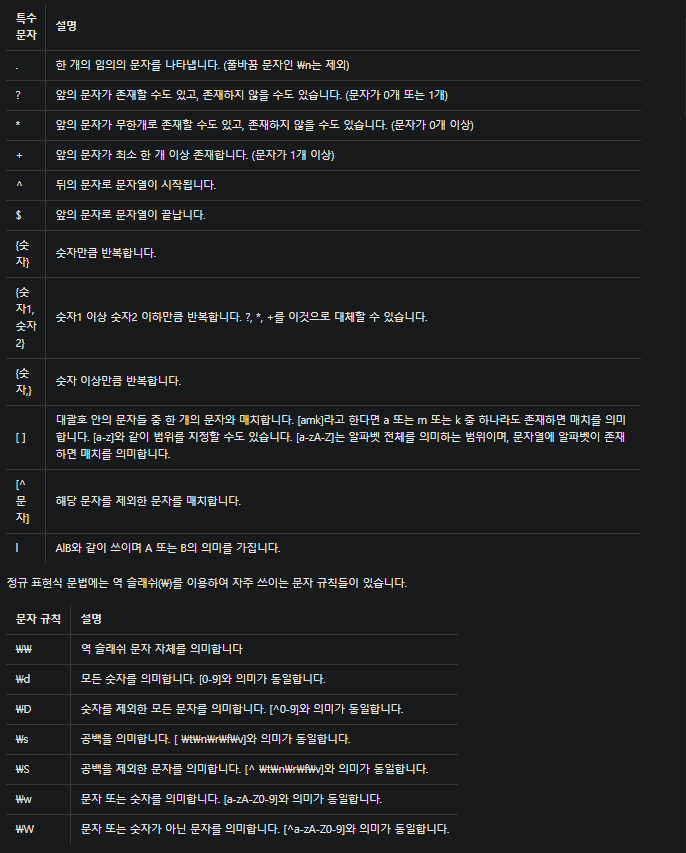

   


- 정규표현식 모듈 함수
 - 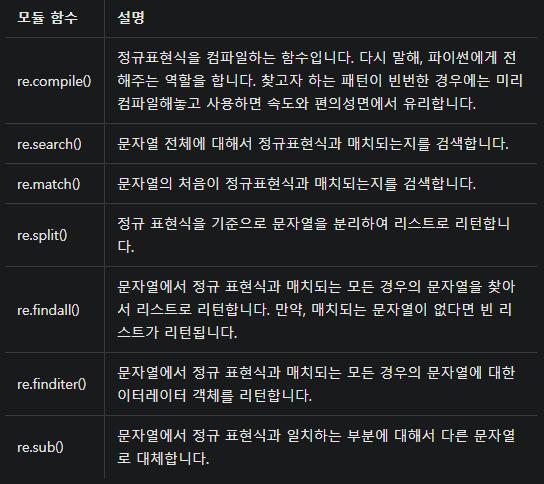

 -re.compile()에 정규 표현식을 컴파일 하고, re.search()를 통해 해당 정규 표현식이 입력 텍스트와 매치되는지를 확인.

- .  < --- 기호


 - .은 한 개의 임의의 문자를 나타냄. 
  -예) 정규 표현식이 a,c라고 합시다. a와 c 사이에는 어떤 1개의 문자라도 올 수 잇음. 즉, akc,azc,avc,a5c,a!c와 같은 형태는 모두 a,c의 정규 표현식과 매치 함.


  i

In [0]:
import re
r=re.compile("a.c")
r.search("kkk") # 아무런 결과도 출력되지 않는다.
r.search("abc")

<_sre.SRE_Match object; span=(0, 3), match='abc'>

- 위의 코드는 search의 입력으로 들어오는 문자열에 정규표현식 패턴 a,c이 존재하는 지 확인하는 코드




- ? 기호
 - ?는 ? 앞의 문자가 존재할 수도 있고, 존재하지 않을 수도 있는 경우를 나타냄.
  - 예) 정규 표현식이 ab?c라고 함. 이 경우 이 정규 표현식에서의 b는 있다고 취급할 수도 있고, 없다고 취급할 수 있음. 즉, abc와 ac모두 매치 가능.



In [0]:
import re
r=re.compile("ab?c")
r.search("abbc") # 아무런 결과도 출력되지 않는다.
r.search("abc")
# b가 있는 것으로 판단하여 abc를 매치하는 것을 볼 수 있음.
r.search("ac")

<_sre.SRE_Match object; span=(0, 2), match='ac'>

 - * 기호 
  - *은 바로 앞의 문자가 0개 이상일 경우를 나타냄.
   - 앞의 문자는 존재하지 않을 수도 있으며, 또는 여러 개잉ㄹ 수도 있다.
   - 예) 정규 표현식이 abc라고 하자. 그렇다면 ac, abc, abbc, abbbc 등과 매치할 수 있으며 b의 갯수는 무수히 많아도 상관 없다.
   

In [0]:
import re
r=re.compile("ab*c")
r.search("a") # 아무런 결과도 출력되지 않는다.
r.search("ac")

r.search("abbbbc") 

<_sre.SRE_Match object; span=(0, 6), match='abbbbc'>

- + 기호
 - + 는 * 와 유사함.  하지만 다른 점은 앞의 문자가 최소 1개 이상이여야 한다는 점.
 - 예 ) 정규 표현식이 ab+c라고 한다면, ac는 매치 안됨. 

 

In [0]:
import re
r =re.compile("ab*c")
r.search("ac")


r.search("abc")

<_sre.SRE_Match object; span=(0, 3), match='abc'>

- ^ 기호
 - ^ 는 시작되는 글자를 자정합니다. 가령 정규표현식이 ^a라면 a로 시작되는 문자열만 찾음.
 

In [0]:
import re
r=re.compile("^a")
r.search("bbc") 

r.search("ab")

# bbc는 a로 시작되지 않지만, ab는 a로 시작되기 때문에 매치 됨.


<_sre.SRE_Match object; span=(0, 1), match='a'>

- {숫자1, 숫자2} 기호

 - 문자에 해당 기호를 붙이면, 해당 문자를 숫자1 이상 숫자2 이하만큼 반복
 - 예를 들어서 정규  표현식이 ab{2,8}c라면 a와 c 사이에 b가 존재하면서 b는 2개 이상 8개 이하인 문자열에 대해서 매치

 

In [0]:
import re
r=re.compile("ab{2,8}c")
r.search("ac") # 아무런 결과도 출력되지 않는다.
r.search("ac") # 아무런 결과도 출력되지 않는다.
r.search("abc") # 아무런 결과도 출력되지 않는다.
r.search("abbc")

<_sre.SRE_Match object; span=(0, 4), match='abbc'>

- {숫자,} 기호
 - 문자에 해당 기호를 붙이면 해당 문자를 숫자 이상 만큼 반복.
 - 예) 정규  표현식이 a{2,}bc라면 뒤에 bc가 붙으면서 a의 갯수가 2개 이상인 경우인 문자열과 매치.
 - 또한 만약 {0,}을 쓴다면 *와 동일한 의미가 되며, {1.}을 쓴다면 +와 동일한 의미
 

In [0]:
import re
r=re.compile("[abc]") # [abc]는 [a-c]와 같다.
r.search("zzz") # 아무런 결과도 출력되지 않는다.
r.search("a")

<_sre.SRE_Match object; span=(0, 1), match='a'>

- [] 기호
 - [] 안에 문자들을 넣으면 그 문자들 중 한 개의 문자와 매치라는 의미를 가짐.
  예를 들어서 정규 표현식이 [abc]라면, a 또는 b또는 c가 들어가있는 문자열과 매치됨.


  

In [3]:
import re

r = re.compile("[abc]")
r.search("zzz")


r.search("a")

r.search("aaaaaaa")



r.search("baac")

<_sre.SRE_Match object; span=(0, 1), match='b'>

 - [^ 문자 기호
  - ^와는 완전히 다른 의미
  - 여기서는 ^ 기호 뒤에 붙은 문자들을 제외한 모든 문자 매치하는 역할을 함.
  - [^ abc] 라는 정규 표현식이 있다면, a 또는 b 또는 c가 들어간 문자열을 제외한 모든 문자열을 매치.
  i

In [0]:
mport re
r=re.compile("[^abc]")
r.search("a") # 아무런 결과도 출력되지 않는다.
r.search("ab") # 아무런 결과도 출력되지 않는다.
r.search("b") # 아무런 결과도 출력되지 않는다.
r.search("d")

### 정규 표현식 모듈 함수 예제
 - 지금까지 정규 표현시 문법에 대해 이해를 위해 정규 표현식 모듈 함수 중에서 re.compile()과 re.serach()를 사용함.
 - 다른 정규 표현식 모듈 함수 예제

  - re.match() 와 re.search() 차이
   -search()가 정규 표현식 전체에 대해서 문자열이 매치 하는지를 본다면, match()는 문자열의 첫 부분부터 정규 표현식과 매치하는지를 확인.

   - 문자열 중간에 찾을 패턴이 있다고 하더라도, match 함수는 문자열의 시작에서 패턴이 일치하지 않으면 찾지 않음.

   



 #### re.match()

In [6]:
import re
r = re.compile("ab.")

r.search("kkkabc") # <_sre.SRE_Match object; span=(3, 6), match='abc'>

r.match("kkkabc")

r.match("abckkk") # <_sre.SRE_Match object; span=(0, 3), match='abc'>
# ab. 다음에는 어떤 한 글자가 조재할 수 있다는 패턴을 의미.
# search 모듈 함수에 kkabc라는 문자열을 넣어 매치되는지 확인한다면.
# abc라는 문자열에 매치되어 Match object를 리턴.
# 하지만 match 모듈 함수의 경우 앞 부분이 ab.와 매치되지 않기 때문에, 아무런 결과도 출력되지 않음.
# 시작 부분에서 패턴과 매치되었기 때문에 정상적으로 Match object를 리턴.


<_sre.SRE_Match object; span=(0, 3), match='abc'>

#### re.split()
 - split() 함수는 입력된 정규 표현식을 기준으로 문자열들을 분리하여 리스트로 리턴.
 - 자연어 처리에 있어서 가장 많이 사용되는 정규 표현식 함수 중 하나,


 

In [8]:
import re
text="사과 딸기 수박 메론 바나나"
re.split(" ",text)

['사과', '딸기', '수박', '메론', '바나나']

In [9]:
import re
text="""사과
딸기
수박
메론
바나나"""
re.split("\n",text)

['사과', '딸기', '수박', '메론', '바나나']

In [10]:
import re
text="사과*딸기*수박*메론*바나나"
re.split("\+", text)

['사과*딸기*수박*메론*바나나']

In [0]:
#### re.findall()
 - 함수는 정규 표현식과 매치되는 모든 문자열들을 리스트로 리턴하니다. 단, 매치 되는 문자열이 없다면 빈 리스트를 리턴.
 

In [15]:
import re
text="""이름 : 김철수
전화번호 : 010 - 1234 - 1234
나이 : 30
성별 : 남"""  
re.findall("\d+",text)
# 정규 표현식으로 숫자를 입려가핮, 전체 텍스트로부터 숫자만 찾아내서 리스트로 리턴하는 것을 볼 수 있습니다.
# 만약 입력 텍스트에 숫자가 없다면 빈 리스트를 리턴.

re.findall("\d+","문자열입니다.")



[]

#### re.sub()
 - 함수는 정규 표현식 패턴과 일치 하는 문자열을 찾아 다른 문자열로 대체할 수 있다.

In [16]:
import re
text="Regular expression : A regular expression, regex or regexp[1] (sometimes called a rational expression)[2][3] is, in theoretical computer science and formal language theory, a sequence of characters that define a search pattern."
re.sub('[^a-zA-Z]',' ',text)
# 영어 문자에 각주 등과 같은 이유로 특수 문자가 섞여있으며, 자연어 처리를 위해 특수 문자를 제거하고 싶다면
# 알파벳 외의 문자는 공백으로 처리하는 등으로 사용.

'Regular expression   A regular expression  regex or regexp     sometimes called a rational expression        is  in theoretical computer science and formal language theory  a sequence of characters that define a search pattern '

### 정규 표현식 텍스트 전처리 예제


In [18]:
import re  

text = """100 John    PROF
101 James   STUD
102 Mac   STUD"""  

re.split('\s+', text)  

#'\s+'는 공백을 찾아내는 정규표현식입니다. 뒤에 붙는 +는 최소 1개 이상의 패턴을 찾아낸다는 의미입니다.
# s는 공백을 의미하기 때문에 최소 1개 이상의 공백인 패턴을 찾아냄.
# 

['100', 'John', 'PROF', '101', 'James', 'STUD', '102', 'Mac', 'STUD']

In [19]:
re.findall('\d+',text)  
# 숫자에 해당되는 정규표현식 +를 붙였으므로 최소 1개이상의 숫자에 해당하는 값을 의미함. 
# findall은 해당 정규 표현식에 일치하는 값을 찾아내는 메소드




['100', '101', '102']

- 해당 코드의 결과는 위와 같습니다. 이번에는 텍스트로부터 대문자인 행의 값만 가져오고 싶다고 합시다. 이 경우에는 정규 표현식에 대문자를 기준으로 매치시키면 됩니다. 하지만 정규 표현식에 대문자라는 기준만을 넣을 경우에는 문자열을 가져오는 것이 아니라 모든 대문자 각각을 갖고오게 됩니다.

In [20]:
re.findall('[A-Z]',text)

['J', 'P', 'R', 'O', 'F', 'J', 'S', 'T', 'U', 'D', 'M', 'S', 'T', 'U', 'D']

- 여러가지 방법이 있겠찌만, 대문자가 연속적으로 4번 등장하는 경우로 조건을 추가.